In [281]:
import pandas as pd
import matplotlib.pyplot as plt

In [282]:
all_matchs = pd.read_excel('statistics.xlsx')
for i in range(len(all_matchs)):
    if ('Women' in all_matchs.loc[i, 'league'] and all_matchs.loc[i, 'algorithm'] == 1) \
    or ('Women' not in all_matchs.loc[i, 'league'] and all_matchs.loc[i, 'algorithm'] == 2):
        all_matchs = all_matchs.drop(index=i)
all_matchs.reset_index(drop=True, inplace=True)

In [283]:
df = all_matchs[['date', 'result']]
df.insert(2, 'count_win',
    [1 if df.loc[i, 'result'] == 'win' else 0 for i in range(len(df))])
df.insert(3, 'count_lose',
    [1 if df.loc[i, 'result'] == 'lose' else 0 for i in range(len(df))])
for i in range(1, len(df)):
    if df.loc[i, 'date'] == df.loc[i-1, 'date']:
        if df.loc[i, 'result'] == 'win':
            df.loc[i, 'count_win'] = df.loc[i-1, 'count_win'] + 1
            df.loc[i, 'count_lose'] = df.loc[i-1, 'count_lose']
        else:
            df.loc[i, 'count_win'] = df.loc[i-1, 'count_win']
            df.loc[i, 'count_lose'] = df.loc[i-1, 'count_lose'] + 1

In [284]:
count_min = 3
for i in range(len(df)):
    if df.loc[i, 'count_win'] + df.loc[i, 'count_lose'] <= count_min:
        df.drop([i], inplace=True)
df.reset_index(drop=True, inplace=True)
# pd.options.mode.chained_assignment = None

In [285]:
df.insert(4, 'payout_ratio',
    [df.loc[i, 'count_win'] / (df.loc[i, 'count_win'] + df.loc[i, 'count_lose']) for i in range(len(df))])
df = df.drop_duplicates(subset='date', keep='last')
df = df.drop(columns=['count_win', 'count_lose', 'result'])
df.reset_index(drop=True, inplace=True)

In [286]:
df.insert(2, 'rolling_mean', None)
df['rolling_mean'] = df['payout_ratio'].rolling(7).mean()

std = 0.1618176907505519
mean = 0.6131282764691972


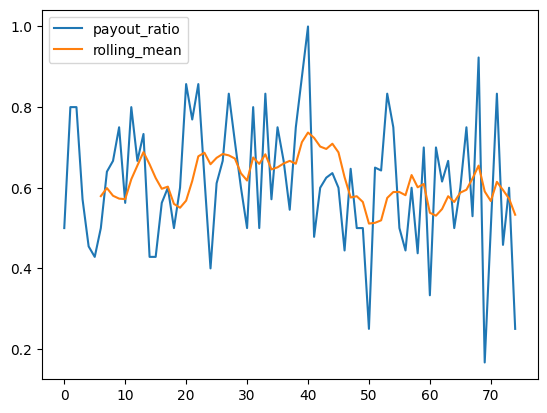

In [287]:
# df['rolling_mean'].plot()
df.plot()
# df.head(20)
print(f'std = {df["payout_ratio"].std()}')
print(f'mean = {df["payout_ratio"].mean()}')
# print(f'median = {df.median(numeric_only=True)}')
# df.plot(x='date', y='payout_ratio')